# Red Wine Quality: Clustering

<img src='wine.jpg' width='600'>

This [dataset](https://archive.ics.uci.edu/dataset/186/wine+quality) is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

## About the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
# Read data
df = pd.read_csv("winequality-red.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.shape

(1599, 12)

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.nunique().sort_values()

quality                   6
free sulfur dioxide      60
alcohol                  65
citric acid              80
pH                       89
residual sugar           91
fixed acidity            96
sulphates                96
volatile acidity        143
total sulfur dioxide    144
chlorides               153
density                 436
dtype: int64

         count
quality       
5          681
6          638
7          199
4           53
8           18
3           10


<Axes: xlabel='quality'>

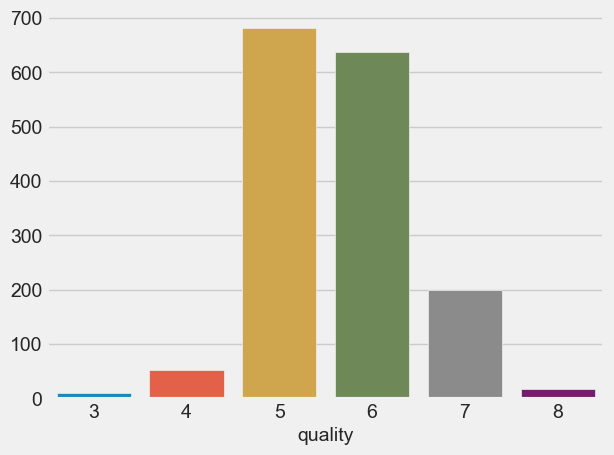

In [10]:
print(df.quality.value_counts().to_frame())
sns.barplot(x = df.quality.value_counts().index, y = df.quality.value_counts().values)

In [33]:
df_quality = df.quality.value_counts(normalize=True).to_frame()
df_quality['proportion'] = df_quality['proportion'] * 100
df_quality.rename(columns = {'proportion': 'Percentages'}, inplace=True)
df_quality

,Percentages
quality,
5,42.589118
6,39.899937
7,12.445278
4,3.314572
8,1.125704
3,0.625391


In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


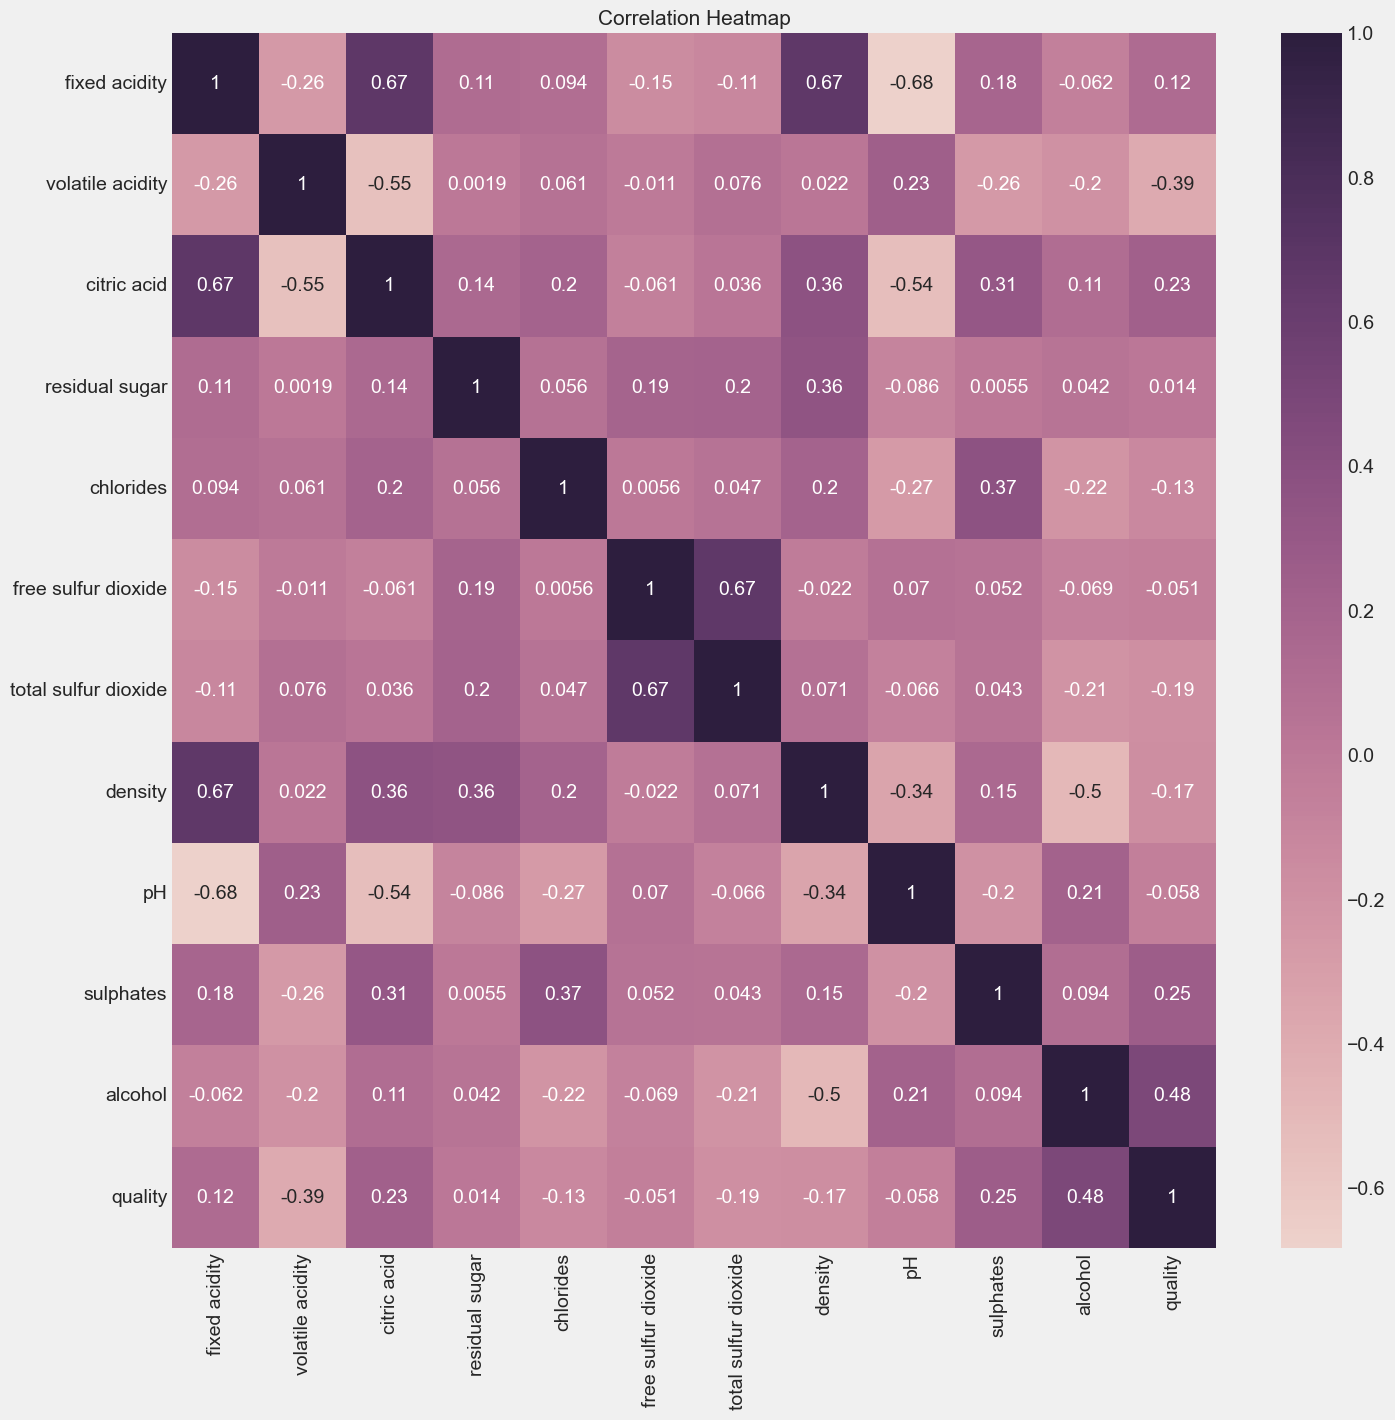

In [13]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

## Clustering Methods

### 1 — K-Means

In [14]:
### BEGIN SOLUTION
from sklearn.cluster import KMeans

# Create and fit a range of models
km_list = list()
float_columns = [x for x in df.columns if x not in ['quality']]
for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(df[float_columns])
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

[Text(0.5, 0, 'Cluster'), Text(0, 0.5, 'Inertia')]

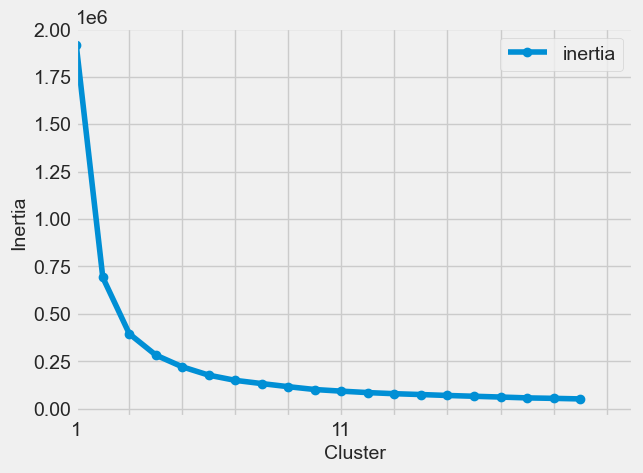

In [15]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia')
### END SOLUTION

In [36]:
### BEGIN SOLUTION
km = KMeans(n_clusters=8, random_state=42)
km = km.fit(df[float_columns])
df['k-means'] = km.predict(df[float_columns])
df.sample(9)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k-means
1194,7.0,0.745,0.12,1.8,0.114,15.0,64.0,0.99588,3.22,0.59,9.5,6,7
1424,8.3,0.260,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,6,1
440,12.6,0.310,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8,1
1465,6.8,0.590,0.10,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.7,5,7
1416,10.0,0.320,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.6,5,4
1025,8.6,0.830,0.00,2.8,0.095,17.0,43.0,0.99822,3.33,0.60,10.4,6,3
56,10.2,0.420,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,5,4
287,7.5,0.400,0.12,3.0,0.092,29.0,53.0,0.99670,3.37,0.70,10.3,6,7
44,6.8,0.670,0.02,1.8,0.050,5.0,11.0,0.99620,3.48,0.52,9.5,5,4


In [38]:
(df[['quality','k-means']]
 .groupby(['quality','k-means'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))
### END SOLUTION

number
quality k-means        
3       1             1
        3             3
        4             6
4       0             4
        1            11
        3             8
        4            22
        6             2
        7             6
5       0            77
        1           145
        2            49
        3           110
        4           136
        6            66
        7            98
6       0            42
        1           181
        2             6
        3           143
        4           157
        6            15
        7            94
7       0             6
        1            52
        3            40
        4            78
        5             2
        6             5
        7            16
8       0             2
        1             4
        3             2
        4             9
        7             1

### 2 — Agglomerative

In [39]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=7, linkage='ward', compute_full_tree=True)
ag = ag.fit(df[float_columns])
df['agglom'] = ag.fit_predict(df[float_columns])

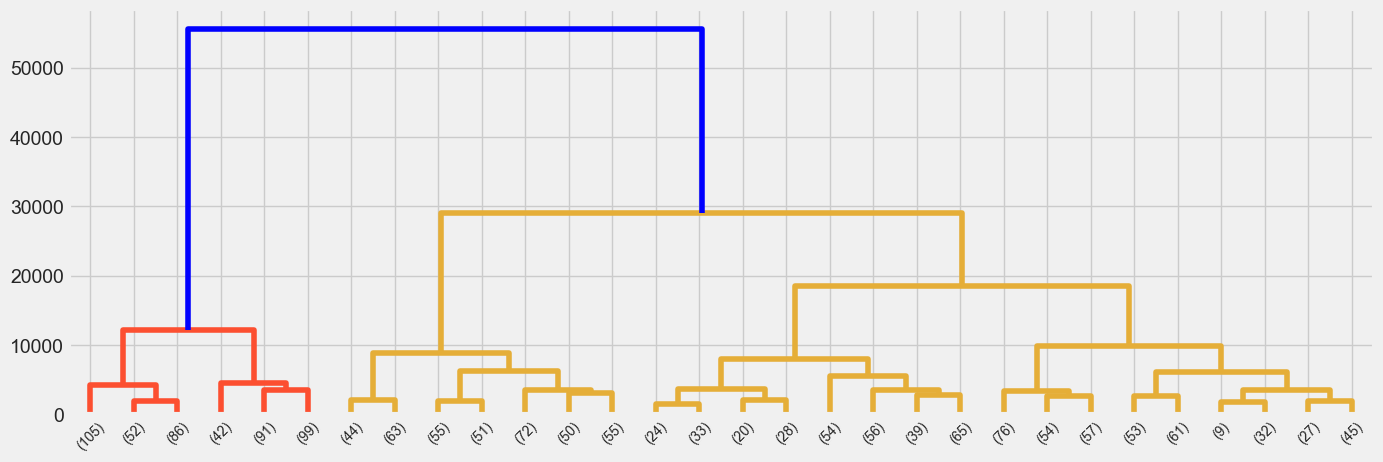

In [40]:
# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')
### END SOLUTION

In [43]:
# First, for Agglomerative Clustering:
(df[['quality','agglom']]
 .groupby(['quality','agglom'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
quality agglom        
3       0            7
        2            1
        3            2
4       0           29
        1            2
        2            6
        3           11
        4            1
        6            4
5       0          232
        1           95
        2           87
        3          124
        4           61
        6           82
6       0          278
        1           33
        2           92
        3          175
        4            6
        6           54
7       0          120
        1            9
        2           15
        3           45
        5            2
        6            8
8       0           12
        1            1
        2            1
        3            2
        6            2

### 3 — Mean Shift

In [44]:
from sklearn.cluster import MeanShift
ms  = MeanShift(bandwidth=2.8, n_jobs=-1) 
ms = ms.fit(df[float_columns])

In [45]:
np.unique(ms.labels_)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [46]:
df['MeanShift'] = ms.fit_predict(df[float_columns])

In [48]:
(df[['quality','MeanShift']]
 .groupby(['quality','MeanShift'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
quality MeanShift        
3       0               4
        1               1
        13              1
        22              1
        37              1
...                   ...
8       277             1
        282             1
        305             1
        309             1
        318             1

[512 rows x 1 columns]

### 4 — DBSCAN

In [49]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.5, min_samples=11, metric='euclidean')
dbs = dbs.fit(df[float_columns])

In [50]:
np.unique(dbs.labels_)

array([-1], dtype=int64)

In [51]:
df['dbscan'] = dbs.fit_predict(df[float_columns])

In [52]:
(df[['quality','dbscan']]
 .groupby(['quality','dbscan'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

,,number
quality,dbscan,
3,-1,10
4,-1,53
5,-1,681
6,-1,638
7,-1,199
8,-1,18
